## Identify which factors predict future user adoption.

### 1. Load 2 csv files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

users_df = pd.read_csv('takehome_users.csv', encoding='latin-1')
display(users_df.head())
print(users_df.shape)

users_engage_df = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')
display(users_engage_df.head())
print(users_engage_df.shape)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


(12000, 10)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


(207917, 3)


In [2]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [3]:
users_engage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
users_engage_df.visited.value_counts()

1    207917
Name: visited, dtype: int64

In [5]:
users_engage_df.sort_values(by=['user_id','time_stamp'], axis=0, ascending=True, inplace=True)
users_engage_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


### 2. Define function to find out which user_id's are adopted users

In [6]:
def find_user_3_logins(df):
    import datetime
    uid_list = list(df.user_id.unique())
    uid_3 =[]
    for uid in uid_list:
        tmp_df = df.loc[df.user_id == uid, ['user_id', 'time_stamp']].reset_index()
        tmp_df['row_id'] = list(range(len(tmp_df)))
        
        flag = 0
        r = 0
        for r in range(len(tmp_df)-2):
            start_t_string = tmp_df.loc[tmp_df.row_id == r, 'time_stamp'].values[0]
            start_t = datetime.datetime.strptime(start_t_string, '%Y-%m-%d %H:%M:%S')
            
            end_t_string = tmp_df.loc[tmp_df.row_id == r+2, 'time_stamp'].values[0]
            end_t = datetime.datetime.strptime(start_t_string, '%Y-%m-%d %H:%M:%S')
            
            difference = end_t - start_t
            
            if difference.days < 7:
                uid_3.append(tmp_df.loc[tmp_df.row_id == r, 'user_id'].values[0])
                #print(tmp_df.loc[tmp_df.row_id == r, 'user_id'].values[0])
                break
    
    return uid_3

In [7]:
uid_flag_1 = find_user_3_logins(users_engage_df)

### 3. Merge adopted user flag with users_df.csv file

In [8]:
users_df['adopted_user'] = pd.Series(users_df.object_id.isin(uid_flag_1)*1)

In [9]:
print(users_df.shape)
display(users_df.head())

(12000, 11)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


### 4. Identify which factors predict future user adoption

### 4.1 Data Exploration

In [10]:
print(users_df.adopted_user.value_counts())
print(users_df.adopted_user.value_counts(normalize=True))

0    9752
1    2248
Name: adopted_user, dtype: int64
0    0.812667
1    0.187333
Name: adopted_user, dtype: float64


In [11]:
# fill null values with 0
users_df.invited_by_user_id.fillna(0,inplace=True)

In [13]:
import time
import datetime
from datetime import datetime, timedelta
# create a new column that converts the creation time into a unix time 
convt = []
for i in range(len(users_df.creation_time)):
    dt = datetime.strptime(users_df.creation_time[i], '%Y-%m-%d %H:%M:%S')
    convt.append(time.mktime(dt.timetuple()))
users_df['unix_creation_time'] = pd.Series(convt)

In [14]:
# fill null values in last_session_time with creation time
users_df.last_session_creation_time.fillna(users_df.unix_creation_time,inplace=True)

In [15]:
#datetime.fromtimestamp(users_df.last_session_creation_time[3])

In [16]:
# if last_session_creation_time is missing, then its gap with creation_time is defined as 0
startend = []
for i in range(len(users_df.creation_time)):
    gap = (datetime.fromtimestamp(users_df.last_session_creation_time[i])-\
           datetime.strptime(users_df.creation_time[i], '%Y-%m-%d %H:%M:%S')).total_seconds()
    startend.append(gap)
users_df['gap'] = pd.Series(startend)

# convert the seconds to days
users_df['gap'] = users_df.gap/3600/24 

# set those 2 negative timing gaps as 0
users_df.gap[users_df.gap < 0] = 0

/Users/lisalb168/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


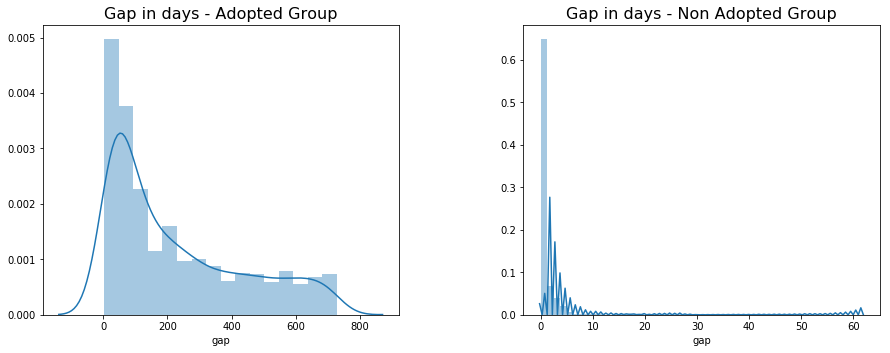

In [17]:
# check if the distribution of gap is different in adopted 0 and 1 group
# it is obvious that by definition, if the gap is < 7 days, this user will automatically not an adopted user,
# but because there are missing values in the last session time and we made the assumption that the gaps for these 
# users should be viewed as 0 (assuming start time = last session time), and in reality it's not 100% the case since
# we have no idea of what's the actual values in those missingness.
# that's why there are data discrepancies. So we'll fit a model with the variable "gap" and a model without it.

import seaborn as sns
plt.figure(figsize=(15,5))

plt.subplot(121)
g = sns.distplot(users_df[(users_df['adopted_user']==1)]['gap'])
g.set_title("Gap in days - Adopted Group", fontsize=16)

plt.subplot(122)
g1 = sns.distplot(users_df[(users_df['adopted_user']==0)]['gap'])
g1.set_title("Gap in days - Non Adopted Group", fontsize=16)

plt.subplots_adjust(hspace = 0.4, wspace = 0.35, top = 0.93)
plt.show()

In [18]:
# majority of the users are not invited by anyone
# flag those invited by some other users as 1, this is a relationship indicator
invite = (users_df.invited_by_user_id > 0)*1
print(invite.value_counts())
users_df['relation'] = pd.Series(invite)

1    6417
0    5583
Name: invited_by_user_id, dtype: int64


22.0


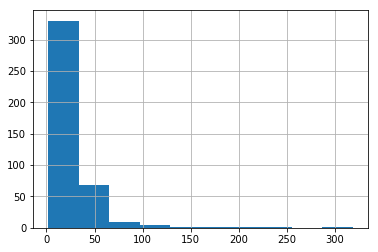

In [19]:
# half of these organizations have users more than 22 counts
# group those organizations who have more than 50 users together
ct = users_df.org_id.value_counts()
print(np.median(ct))
ct.hist()
plt.show()
users_df['org'] = pd.Series(users_df.org_id.isin(users_df.org_id.value_counts()>=50)*1)

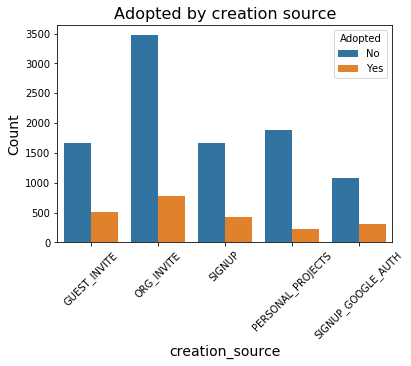

In [20]:
g = sns.countplot(x='creation_source', data=users_df, hue='adopted_user')
g.set_title("Adopted by creation source", fontsize=16)
g.set_xlabel("creation_source", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Adopted', loc='best', labels=['No', 'Yes'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

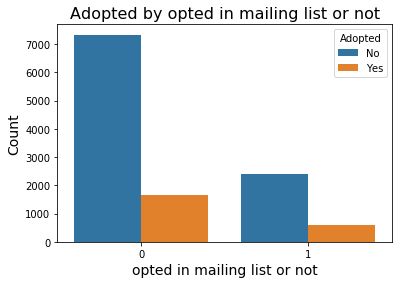

In [21]:
g = sns.countplot(x='opted_in_to_mailing_list', data=users_df, hue='adopted_user')
g.set_title("Adopted by opted in mailing list or not", fontsize=16)
g.set_xlabel("opted in mailing list or not", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Adopted', loc='best', labels=['No', 'Yes'])
plt.show()

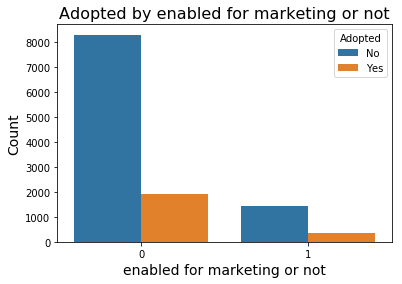

In [22]:
g = sns.countplot(x='enabled_for_marketing_drip', data=users_df, hue='adopted_user')
g.set_title("Adopted by enabled for marketing or not", fontsize=16)
g.set_xlabel("enabled for marketing or not", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Adopted', loc='best', labels=['No', 'Yes'])
plt.show()

### 4.2 Data preparation for building a Random Forest classification model

In [23]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted_user                  12000 non-null int64
unix_creation_time            12000 non-null float64
gap                           12000 non-null float64
relation                      12000 non-null int64
org                           12000 non-null int64
dtypes: float64(4), int64(7), object(4)
memory usage: 1.4+ MB


In [24]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,unix_creation_time,gap,relation,org
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1.398164e+09,0.000000,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1.384516e+09,135.708333,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1.363760e+09,0.000000,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1.369149e+09,0.708333,1,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1.358446e+09,4.666667,1,0


In [25]:
droplist = ['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 'org_id', 'invited_by_user_id', 'unix_creation_time']
users_df.drop(droplist, axis=1, inplace=True)
users_df = pd.get_dummies(users_df, columns=['creation_source'])
users_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,gap,relation,org,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,0.000000,1,0,1,0,0,0,0
1,0,0,1,135.708333,1,1,0,1,0,0,0
2,0,0,0,0.000000,1,0,0,1,0,0,0
3,0,0,0,0.708333,1,1,1,0,0,0,0
4,0,0,0,4.666667,1,0,1,0,0,0,0


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [27]:
# train test split using test_size = 0.2 
X = users_df.drop('adopted_user',axis=1)
y = users_df['adopted_user']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12000, 10) (12000,) (9600, 10) (9600,) (2400, 10) (2400,)


### 4.3a Random Forest Model with variable "gap" in the dataset

In [28]:
import time
start = time.process_time()

niter, verbose, random_state = [5, 0, 123] 
param_space = {'n_estimators': range(100,500,100), 'max_depth': range(1,10)} 

clf = RandomForestClassifier(random_state=random_state)
cv_clf = RandomizedSearchCV(clf, param_space, cv=5, n_iter=niter, scoring='roc_auc', return_train_score=True, 
                            verbose=verbose, n_jobs=-1) 
cv_clf.fit(X_train, y_train)

print('completed in {} s'.format(time.process_time() - start))

completed in 2.0304920000000095 s


In [29]:
candidate_params = cv_clf.cv_results_['params']
print("1. Five candidate parameters are: ", candidate_params)
best_n = cv_clf.best_params_['n_estimators']
best_d = cv_clf.best_params_['max_depth']
print("2. Best number of trees and depth are: {} and {}".format(best_n, best_d))
best_score = cv_clf.best_score_
print("3. Best average CV validation score is: ", best_score)
std_of_best_score = cv_clf.cv_results_['std_test_score'][max(enumerate(cv_clf.cv_results_['mean_test_score']),key=(lambda x: x[1]))[0]]
print("4. Standard Deviation of Best average CV validation score is: ", std_of_best_score)
mean_test_score = cv_clf.cv_results_['mean_test_score']
print("5. Average CV validation score: ", mean_test_score)
std_test_score = cv_clf.cv_results_['std_test_score']
print("6. Standard Deviation of CV validation score: ", std_test_score)
mean_train_score = cv_clf.cv_results_['mean_train_score']
print("7. Average CV training score: ", mean_train_score)
std_train_score = cv_clf.cv_results_['std_train_score']
print("8. Standard Deviation of CV training score: ", std_train_score)

print("1st fold validation score: ", cv_clf.cv_results_['split0_test_score'])
print("2nd fold validation score: ", cv_clf.cv_results_['split1_test_score'])
print("3rd fold validation score: ", cv_clf.cv_results_['split2_test_score'])
print("4th fold validation score: ", cv_clf.cv_results_['split3_test_score'])
print("5th fold validation score: ", cv_clf.cv_results_['split4_test_score'])
print("1st fold training score: ", cv_clf.cv_results_['split0_train_score'])
print("2nd fold training score: ", cv_clf.cv_results_['split1_train_score'])
print("3rd fold training score: ", cv_clf.cv_results_['split2_train_score'])
print("4th fold training score: ", cv_clf.cv_results_['split3_train_score'])
print("5th fold training score: ", cv_clf.cv_results_['split4_train_score'])

1. Five candidate parameters are:  [{'n_estimators': 200, 'max_depth': 1}, {'n_estimators': 300, 'max_depth': 5}, {'n_estimators': 200, 'max_depth': 4}, {'n_estimators': 200, 'max_depth': 9}, {'n_estimators': 100, 'max_depth': 9}]
2. Best number of trees and depth are: 300 and 5
3. Best average CV validation score is:  0.996982209390474
4. Standard Deviation of Best average CV validation score is:  0.000682639565855746
5. Average CV validation score:  [0.99022583 0.99698221 0.99697092 0.99694672 0.99646374]
6. Standard Deviation of CV validation score:  [0.00139675 0.00068264 0.00051726 0.00109731 0.00174725]
7. Average CV training score:  [0.99045764 0.99818111 0.99770619 0.99938989 0.9993863 ]
8. Standard Deviation of CV training score:  [8.02828066e-04 1.36783073e-04 2.06680625e-04 4.55999804e-05
 4.09478219e-05]
1st fold validation score:  [0.98938603 0.99788258 0.99793455 0.99779925 0.99773563]
2nd fold validation score:  [0.99007421 0.99678579 0.99655281 0.99702056 0.99644797]
3r

### Feature importance

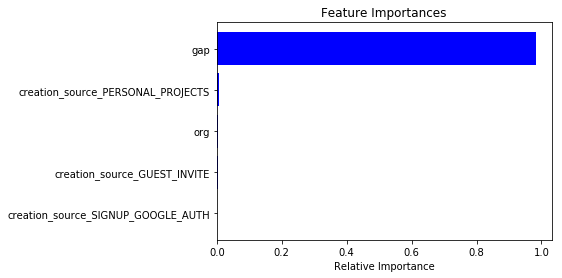

In [30]:
clf = RandomForestClassifier(random_state=random_state,
                             n_estimators = best_n, max_depth = best_d)
clf.fit(X_train, y_train)

# plot the top M feature importances
import numpy as np
M = 5
importances = clf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(M), importances[indices][-M:], color='b', align='center')
plt.yticks(range(M), [features[i] for i in indices[-M:]])
plt.xlabel('Relative Importance')
plt.show()

### Confusion matrix, AUC and ROC for test dataset

In [31]:
y_test.value_counts()

0    1937
1     463
Name: adopted_user, dtype: int64

In [32]:
import sklearn
preds = clf.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, preds, labels=None, sample_weight=None)
report = classification_report(y_test, preds)
probs = clf.predict_proba(X_test)
auc = roc_auc_score(y_test, probs[:,1])
accuracy = float(np.sum(preds==y_test))/y_test.shape[0] 

print("Confusion Matrix is: \n", confusion_matrix)
print("Classification Report: \n", report)
print("accuracy: %f" % (accuracy))
print("AUC: ", auc)

Confusion Matrix is: 
 [[1911   26]
 [  22  441]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1937
           1       0.94      0.95      0.95       463

   micro avg       0.98      0.98      0.98      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.98      0.98      0.98      2400

accuracy: 0.980000
AUC:  0.998388213609922


### 4.3b Random Forest Model without the variable "gap"

In [33]:
droplist = ['gap']
users_df.drop(droplist, axis=1, inplace=True)
users_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,relation,org,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,1,0,1,0,0,0,0
1,0,0,1,1,1,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,1,1,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0


In [34]:
# train test split using test_size = 0.2 
X = users_df.drop('adopted_user',axis=1)
y = users_df['adopted_user']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12000, 9) (12000,) (9600, 9) (9600,) (2400, 9) (2400,)


In [35]:
import time
start = time.process_time()

niter, verbose, random_state = [5, 0, 123] 
param_space = {'n_estimators': range(100,500,100), 'max_depth': range(1,10)} 

clf = RandomForestClassifier(random_state=random_state)
cv_clf = RandomizedSearchCV(clf, param_space, cv=5, n_iter=niter, scoring='roc_auc', return_train_score=True, 
                            verbose=verbose, n_jobs=-1) 
cv_clf.fit(X_train, y_train)

print('completed in {} s'.format(time.process_time() - start))

completed in 0.7306060000000087 s


In [36]:
candidate_params = cv_clf.cv_results_['params']
print("1. Five candidate parameters are: ", candidate_params)
best_n = cv_clf.best_params_['n_estimators']
best_d = cv_clf.best_params_['max_depth']
print("2. Best number of trees and depth are: {} and {}".format(best_n, best_d))
best_score = cv_clf.best_score_
print("3. Best average CV validation score is: ", best_score)
std_of_best_score = cv_clf.cv_results_['std_test_score'][max(enumerate(cv_clf.cv_results_['mean_test_score']),key=(lambda x: x[1]))[0]]
print("4. Standard Deviation of Best average CV validation score is: ", std_of_best_score)
mean_test_score = cv_clf.cv_results_['mean_test_score']
print("5. Average CV validation score: ", mean_test_score)
std_test_score = cv_clf.cv_results_['std_test_score']
print("6. Standard Deviation of CV validation score: ", std_test_score)
mean_train_score = cv_clf.cv_results_['mean_train_score']
print("7. Average CV training score: ", mean_train_score)
std_train_score = cv_clf.cv_results_['std_train_score']
print("8. Standard Deviation of CV training score: ", std_train_score)

print("1st fold validation score: ", cv_clf.cv_results_['split0_test_score'])
print("2nd fold validation score: ", cv_clf.cv_results_['split1_test_score'])
print("3rd fold validation score: ", cv_clf.cv_results_['split2_test_score'])
print("4th fold validation score: ", cv_clf.cv_results_['split3_test_score'])
print("5th fold validation score: ", cv_clf.cv_results_['split4_test_score'])
print("1st fold training score: ", cv_clf.cv_results_['split0_train_score'])
print("2nd fold training score: ", cv_clf.cv_results_['split1_train_score'])
print("3rd fold training score: ", cv_clf.cv_results_['split2_train_score'])
print("4th fold training score: ", cv_clf.cv_results_['split3_train_score'])
print("5th fold training score: ", cv_clf.cv_results_['split4_train_score'])

1. Five candidate parameters are:  [{'n_estimators': 100, 'max_depth': 2}, {'n_estimators': 300, 'max_depth': 1}, {'n_estimators': 300, 'max_depth': 7}, {'n_estimators': 200, 'max_depth': 6}, {'n_estimators': 400, 'max_depth': 6}]
2. Best number of trees and depth are: 100 and 2
3. Best average CV validation score is:  0.5822120786894412
4. Standard Deviation of Best average CV validation score is:  0.007295335803740546
5. Average CV validation score:  [0.58221208 0.57627148 0.57567846 0.57847725 0.57869303]
6. Standard Deviation of CV validation score:  [0.00729534 0.01822665 0.00825428 0.00684094 0.00685208]
7. Average CV training score:  [0.58938597 0.58037555 0.59485468 0.59481556 0.59482553]
8. Standard Deviation of CV training score:  [0.00295899 0.0035269  0.00118394 0.00119781 0.00128617]
1st fold validation score:  [0.57106835 0.5582599  0.56580303 0.56819554 0.5683192 ]
2nd fold validation score:  [0.59283035 0.59909927 0.5844019  0.58338038 0.58360081]
3rd fold validation sc

### Feature importance

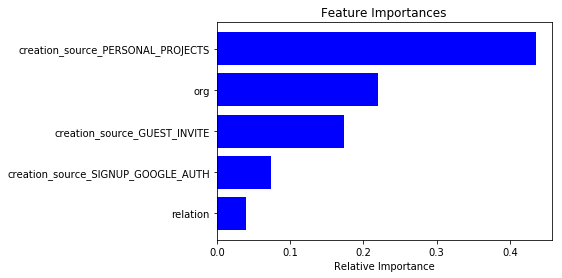

In [37]:
clf = RandomForestClassifier(random_state=random_state,
                             n_estimators = best_n, max_depth = best_d)
clf.fit(X_train, y_train)

# plot the top M feature importances
import numpy as np
M = 5
importances = clf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(M), importances[indices][-M:], color='b', align='center')
plt.yticks(range(M), [features[i] for i in indices[-M:]])
plt.xlabel('Relative Importance')
plt.show()

### Confusion matrix, AUC and ROC for test dataset

In [38]:
import sklearn
preds = clf.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, preds, labels=None, sample_weight=None)
report = classification_report(y_test, preds)
probs = clf.predict_proba(X_test)
auc = roc_auc_score(y_test, probs[:,1])
accuracy = float(np.sum(preds==y_test))/y_test.shape[0] 

print("Confusion Matrix is: \n", confusion_matrix)
print("Classification Report: \n", report)
print("accuracy: %f" % (accuracy))
print("AUC: ", auc)

Confusion Matrix is: 
 [[1937    0]
 [ 463    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1937
           1       0.00      0.00      0.00       463

   micro avg       0.81      0.81      0.81      2400
   macro avg       0.40      0.50      0.45      2400
weighted avg       0.65      0.81      0.72      2400

accuracy: 0.807083
AUC:  0.5561187113291134


/Users/lisalb168/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lisalb168/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lisalb168/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 5. Summary and Discussion

In this exercise, we first defined the target variable "adopted_user" based on the definition given in the instruction sheet and then imputed variables with missing values. Next we did feature engineering by creating a few new features based on the current variables such as "invited_by_user_id", "org_id", "creation_time" and "last_session_creation_time". After cleaning the data we visualized the distribution of most of the variables within each adoption status and then built a Random Forest model to examine which variable is the most predictive of adoption status.

We built 2 Random Forest models and the only difference is that in the second model, we did not include variable "gap", which is defined as the number of days between last sesssion creation time and when they created their account. Intuitively, "gap" should be closely related to the target variable "adopted_user" because if "gap" is less than 7 days then automatically the adoption status should be 0. This can also be seen from the graph that shows the distribution of "gap" within each adoption status. It also turns out that in the first Random Forest model where we included "gap", its feature importance dominates all other variables and contributes to almost 100%. Model AUC of the first model on the test dataset is 99.8%. In reality this may be considered as data leakage, so the variable "gap" probably shouldn't be used in the model construction, and that's the reason why we are fitting the second model.

In the second model where we don't have feature "gap", its performance is quite poor on both the training and testing data, merely a little better than random guess. Based on the feature importance ranking, it looks like the source of account creation is most predictive in user adoption. Other variables such as organizations the user ID is from, and whether the user is invited by another user, also appeared in the top feature list, but they are not as important as creation source.

More feature engineering can be explored to add extra columns into the dataset, and more models can be tried to compare prediction performances, however, due to the interest of time, these options are not carried out here. 